# Task_1 : Idea and Dataset

# First : Idea

In [1]:
# Idea is according to the dataset features of heart failure,
# We can create a model for predicting mortality caused by Heart Failure.
# We can make use of it to take procedures to keep people in good health.

# - Libraries to work with dataset :

In [2]:
import pandas as pd # Dealing with series and dataframes 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt # for data visualization 
import numpy as np  # to deal with arrays
from sklearn.linear_model import LinearRegression as lr   # to build LR ML model
import seaborn as sb  # built in datasets , # for data visualization  
from sklearn.model_selection import train_test_split # for spliting data (train,test), in automatic way
import statsmodels.formula.api as sfa   # do models manually 
from sklearn.preprocessing import PolynomialFeatures  # for ploynomail regression 
from sklearn.pipeline import Pipeline  # esy way to do ML models
from sklearn.preprocessing import StandardScaler # scaling (Standardization)
from sklearn.neighbors import KNeighborsClassifier # Classification algorithm_1 
from sklearn.preprocessing import MinMaxScaler  # scaling (Normalization)
from sklearn.preprocessing import RobustScaler   # scaling (IQR)
from sklearn.naive_bayes import GaussianNB  # Classification algorithm_2
from sklearn import svm   # Classification algorithm_3
from sklearn.cluster import KMeans

# Second : Dataset

In [3]:
data = pd.read_csv("heart_failure_records.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Task_2 : Understanding dataset 

In [4]:
#information about data:
    # heart_failure: 
        # Heart failure means that the heart is unable to pump blood around the body properly. 
        # Heart failure does not mean your heart has stopped working.
    
    # anaemia: Decrease of red blood cells or hemoglobin (boolean)
    
    # creatine_phosphokinase: Level of the CPK/CK enzyme in the blood (mcg/L)
        # Function: provide cells with Energy (ATP)
        # Normal: 10 to 120 micrograms per liter (mcg/L)
        # Form: (CK-MB) 
    
    # ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
        # if it equal 20 means that 20% of the whole blood is pumped and 80% still in the heart.
    
    # Platelets: Platelets in the blood (kiloplatelets/mL)
        # Normal: From ( 150,000 kiloplatelets/ml ) to ( 450,000 kiloplatelets/ml )  
    
    # serum_creatinine: Level of serum creatinine in the blood (mg/dL)
        # level of creatinine determine if kidney work carefully or not as it should get rid of creatinine
        # heart can't transfer the blood for all the body ( kidney so, it doesn't work well and creatinine increase in the blood )
        # Normal: ( Men:  0.74 to 1.35 mg/dL ) and ( Women: 0.59 to 1.04 mg/dL )
    
    # serum_sodium: Level of serum sodium in the blood (mEq/L)
        # Normal: between 135 and 145 milliequivalents per liter
        # Increase the sodium increase the blood pressure and so leads to heart failure.
    # time: Follow-up period (days)

# - Make data more meaningful, according to what we understood :  

In [5]:
data.rename({"creatinine_phosphokinase":"creatinine_phosphokinase_mcg_per_L","ejection_fraction":"ejection_fraction_percentage","platelets":"platelets_kiloplatelets_per_mL","serum_creatinine":"serum_creatinine_mg_per_dL","serum_sodium":"serum_sodium_mEq_per_L","time":"Care_Time_Days"},axis=1,inplace=True)
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Task_3 : Missing values and Categorical data

# - Dataset has no missing values : 

In [6]:
data.isna().sum()

age                                   0
anaemia                               0
creatinine_phosphokinase_mcg_per_L    0
diabetes                              0
ejection_fraction_percentage          0
high_blood_pressure                   0
platelets_kiloplatelets_per_mL        0
serum_creatinine_mg_per_dL            0
serum_sodium_mEq_per_L                0
sex                                   0
smoking                               0
Care_Time_Days                        0
DEATH_EVENT                           0
dtype: int64

# - Dataset has no categorical data : 

In [7]:
data.dtypes

age                                   float64
anaemia                                 int64
creatinine_phosphokinase_mcg_per_L      int64
diabetes                                int64
ejection_fraction_percentage            int64
high_blood_pressure                     int64
platelets_kiloplatelets_per_mL        float64
serum_creatinine_mg_per_dL            float64
serum_sodium_mEq_per_L                  int64
sex                                     int64
smoking                                 int64
Care_Time_Days                          int64
DEATH_EVENT                             int64
dtype: object

# - So, We will do them in seaborn built-in datasets : 

In [8]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

# - Choose titanic dataset : 

In [9]:
titanic = sb.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# First : Missing values  

In [10]:
titanic.isna().sum()
# only three columns --> age(interpolate), embarked(put it by bfill method), deck(drop_column), embark_town(put it by ffill method)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# - Using Drop Method : 

In [11]:
# deck column
titanic.drop("deck",axis=1,inplace=True) 

# - Using Interpolate Method : 

In [12]:
# age column 
titanic.age.interpolate(method="linear",inplace=True)

# - Using fillna_ffill Method : 

In [13]:
# embark_town column
titanic.embark_town.fillna(method="ffill",inplace=True)

# - Using fillna_bfill Method :

In [14]:
# embarked column 
titanic.embarked.fillna(method="bfill",inplace=True)

In [15]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,22.5,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


# - Now, There is no Missing values :

In [16]:
titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Second : Categorical data 

In [17]:
titanic.dtypes   # sex(object), embarked(object), class(category), who(object), adult_male(bool), embark_town(object), alive(object), alone(bool)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [18]:
# sex(object), embarked(object), class(category), who(object), adult_male(bool), embark_town(object), alive(object), alone(bool)
print("sex :",titanic.sex.unique()) 
print("embarked :",titanic.embarked.unique())  
print("class :",titanic["class"].unique())
print("who :",titanic.who.unique())  
print("adult_male :",titanic.adult_male.unique()) 
print("embark_town :",titanic.embark_town.unique()) 
print("alive :",titanic.alive.unique()) 
print("alone :",titanic.alone.unique()) 

sex : ['male' 'female']
embarked : ['S' 'C' 'Q']
class : ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']
who : ['man' 'woman' 'child']
adult_male : [ True False]
embark_town : ['Southampton' 'Cherbourg' 'Queenstown']
alive : ['no' 'yes']
alone : [False  True]


# - Using Mapping method : 

In [19]:
# sex column: 
titanic.sex = titanic.sex.map({"male":1,"female":0})

# - Using Label_encoder method : 

In [20]:
# embarked column:
le = LabelEncoder()
titanic.embarked = le.fit_transform(titanic.embarked)

# - Using one_hot encoder :

In [21]:
# embark_town column:
ohe = OneHotEncoder(sparse=False)
new_df = ohe.fit_transform(titanic[["embark_town"]])
new_df = pd.DataFrame(new_df) 
#0--> Cherbourg            1-->  Queenstown             2--> Southampton
new_df.columns = ["Cherbourg","Queenstown","Southampton"]
titanic.drop("embark_town",axis=1,inplace=True)

In [22]:
titanic = pd.concat([titanic,new_df],axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,no,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,yes,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,yes,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,yes,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,no,True,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,no,True,0.0,0.0,1.0
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,yes,True,0.0,0.0,1.0
888,0,3,0,22.5,1,2,23.4500,2,Third,woman,False,no,False,0.0,0.0,1.0
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,yes,True,1.0,0.0,0.0


# - Using data_type convertion (bool --> int) : 

In [23]:
# adult_male column:
titanic.adult_male = titanic.adult_male.astype(int)

# - Get rid of categotical data in the other columns : 

In [24]:
# class column: 
titanic["class"] = le.fit_transform(titanic["class"])

In [25]:
# who column:
titanic.who = le.fit_transform(titanic.who)

In [26]:
# alive column:
titanic.alive = le.fit_transform(titanic.alive)

In [27]:
# alone ---> bool so change the dtype only 
titanic.alone = titanic.alone.astype(int)

#  - Now, There is no categorical data :

In [28]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,Cherbourg,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,0,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,1,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,1,1,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,1,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,0,1,0.0,0.0,1.0
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,1,1,0.0,0.0,1.0
888,0,3,0,22.5,1,2,23.4500,2,2,2,0,0,0,0.0,0.0,1.0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,1,1,1.0,0.0,0.0


# - No Missing values or Categorical data in the dataset :  

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    int32  
 11  alive        891 non-null    int32  
 12  alone        891 non-null    int32  
 13  Cherbourg    891 non-null    float64
 14  Queenstown   891 non-null    float64
 15  Southampton  891 non-null    float64
dtypes: float64(5), int32(6), int64(5)
memory usage: 90.6 KB


# Task_4 : 3 methods --> data_visualization 

# First : Plot data_visualization 

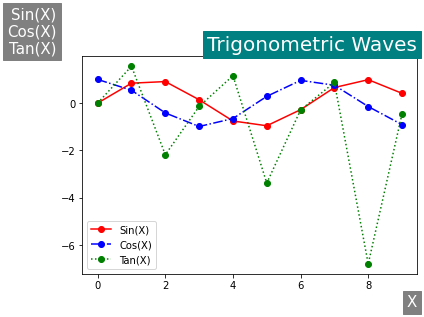

In [30]:
# relation between the trignometric waves.
x = np.arange(0,10)
y = np.sin(x) # ---> red(-)
z = np.cos(x) # ---> blue(--)
a = np.tan(x) # ---> green(:)
plt.plot(x,y,color="red",marker="o",linestyle="-")   
plt.plot(x,z,color="blue",marker="o",linestyle="-.")
plt.plot(x,a,color="green",marker="o",linestyle=":")
plt.xlabel("X",fontsize=15,loc="right",backgroundcolor="grey",color="white")
plt.ylabel("Sin(X)\nCos(X)\nTan(X)",fontsize=15,rotation=0,loc="top",backgroundcolor="grey",color="white")
plt.title("Trigonometric Waves",fontsize=20,backgroundcolor="teal",color="white",loc="right")
plt.legend(["Sin(X)", "Cos(X)", "Tan(X)"])
plt.show()

In [31]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Second : Histgram data_visualization 

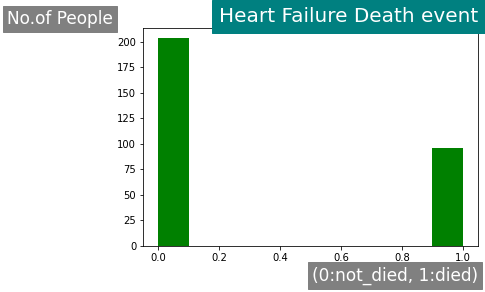

In [32]:
# No.of died and lived people in general 
plt.hist(data.DEATH_EVENT,color="green")
plt.xlabel("(0:not_died, 1:died)",fontsize=17,loc="right",color="white",backgroundcolor="grey")
plt.ylabel("No.of People",fontsize=17,loc="top",color="white",backgroundcolor="grey",rotation=0)
plt.title("Heart Failure Death event",color="white",backgroundcolor="teal",fontsize=20,loc="right")
plt.show()

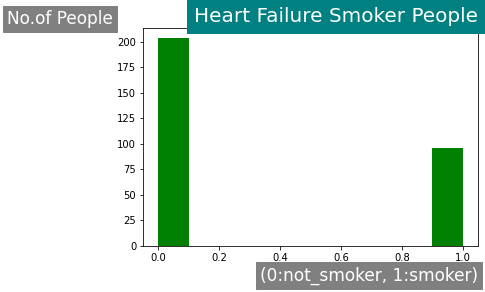

In [33]:
# No.of Smoker and Non_Smoker people
plt.hist(data.smoking,color="green")
plt.xlabel("(0:not_smoker, 1:smoker)",fontsize=17,loc="right",color="white",backgroundcolor="grey")
plt.ylabel("No.of People",fontsize=17,loc="top",color="white",backgroundcolor="grey",rotation=0)
plt.title("Heart Failure Smoker People",color="white",backgroundcolor="teal",fontsize=20,loc="right")
plt.show()

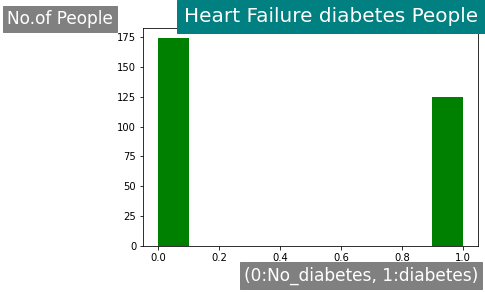

In [34]:
# No.of people that have and don't have diabetes
plt.hist(data.diabetes,color="green")
plt.xlabel("(0:No_diabetes, 1:diabetes)",fontsize=17,loc="right",color="white",backgroundcolor="grey")
plt.ylabel("No.of People",fontsize=17,loc="top",color="white",backgroundcolor="grey",rotation=0)
plt.title("Heart Failure diabetes People",color="white",backgroundcolor="teal",fontsize=20,loc="right")
plt.show()

In [35]:
# No. of People smoke and dead ( of_corse have Heart Failure )
# people have ones will be in the same index(row)
smoke = data.smoking.values
#len(data.smoking.values)   # 299 row
death = data.DEATH_EVENT.values  
s_d_People=[]
for i in range(0,299):
    if smoke[i]==death[i]:
        s_d_People.append(i)
print(s_d_People) # those are the people who has heart_failure, smoke, dead    

[2, 5, 7, 9, 10, 11, 14, 20, 22, 23, 25, 27, 29, 33, 38, 40, 41, 42, 43, 45, 47, 54, 58, 59, 64, 65, 67, 72, 74, 75, 77, 79, 80, 83, 85, 86, 87, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 104, 105, 106, 107, 110, 112, 114, 115, 116, 117, 118, 121, 122, 123, 125, 127, 129, 131, 132, 135, 136, 137, 138, 139, 141, 142, 143, 144, 147, 149, 151, 154, 155, 156, 158, 160, 168, 169, 173, 177, 178, 180, 181, 182, 184, 188, 189, 190, 191, 192, 196, 197, 198, 200, 201, 202, 205, 206, 207, 208, 209, 214, 215, 216, 218, 219, 223, 224, 225, 227, 228, 229, 232, 235, 236, 237, 238, 240, 243, 244, 245, 247, 249, 250, 251, 252, 253, 254, 256, 257, 258, 260, 261, 263, 264, 266, 267, 268, 269, 271, 272, 273, 275, 276, 277, 278, 279, 280, 284, 285, 286, 287, 288, 289, 290, 291, 295, 296]


In [36]:
# we don't care about values, we care about count (167)
# so we will give those people ones and other zeros 
s_d_People = np.ones(len(s_d_People))
s_d_People = pd.DataFrame(s_d_People)
s_d_People.rename({0:"s_d_People"},axis=1,inplace=True)
s_d_People

,s_d_People
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
162,1.0
163,1.0
164,1.0
165,1.0


In [37]:
# others (No_smoker, No_dead) (No_smoker, dead)  (smoker, Not dead) ----> 299 - 167 = (132)
others = np.zeros(132)
others = pd.DataFrame(others)
others.rename({0:"others"},axis=1,inplace=True) 
others 

,others
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
127,0.0
128,0.0
129,0.0
130,0.0


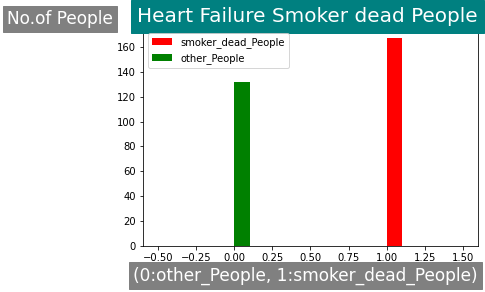

In [38]:
# s_d_People ---> people who has heart_failure, smoke, dead 
# others ----> (No_smoker, No_dead) (No_smoker, dead)  (smoker, Not dead)
plt.hist(s_d_People,color="red")
plt.hist(others,color="green")
plt.legend(["smoker_dead_People","other_People"])
plt.xlabel("(0:other_People, 1:smoker_dead_People)",fontsize=17,loc="right",color="white",backgroundcolor="grey")
plt.ylabel("No.of People",fontsize=17,loc="top",color="white",backgroundcolor="grey",rotation=0)
plt.title("Heart Failure Smoker dead People",color="white",backgroundcolor="teal",fontsize=20,loc="right")
plt.show()

# Third : Bar data_visualization 

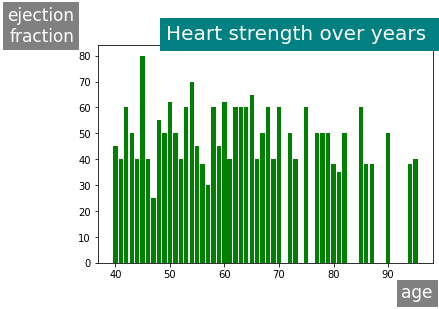

In [39]:
# relation between age and ejection_fraction_percentage
plt.bar(data.age,data.ejection_fraction_percentage,color="green")
plt.xlabel("age",fontsize=17,loc="right",color="white",backgroundcolor="grey")
plt.ylabel("ejection\nfraction",fontsize=17,loc="top",color="white",backgroundcolor="grey",rotation=0)
plt.title("Heart strength over years ",color="white",backgroundcolor="teal",fontsize=20,loc="right")
plt.show()

# Task_5 : Learning Algorithms (Regression)

# First : Linear regression

In [40]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#  Forth : Scatter data_visualization

# - Model_1 in Linear regression : 

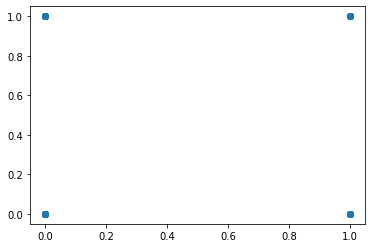

In [41]:
# Build LR ML_Model: that predict person heart failure death according to smoking habit.
plt.scatter(data.smoking,data.DEATH_EVENT) 
plt.show()

# Task_6 : Split dataset (loc/iloc method)

In [42]:
# LR --> Y = a + bx
# x ---> smoking 
# y ---> DEATH_EVENT
# data --> training(80%--->240), testing(20%--->59) 
x_training = data[["smoking"]].iloc[:240,]
y_training = data[["DEATH_EVENT"]].iloc[:240,]
x_testing = data[["smoking"]].iloc[240:,]
y_data = data[["DEATH_EVENT"]].iloc[240:,]

In [43]:
model1 = lr()
model1.fit(x_training,y_training)

LinearRegression()

In [44]:
y_model1 = model1.predict(x_testing)
y_model1

array([[0.39751553],
       [0.36708861],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.36708861],
       [0.36708861],
       [0.36708861],
       [0.39751553],
       [0.39751553],
       [0.39751553],
       [0.397

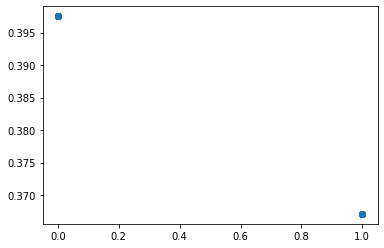

In [45]:
# scatter :
plt.scatter(x_testing,y_model1)
plt.show()

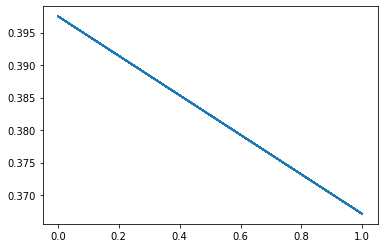

In [46]:
# plotter (line)
plt.plot(x_testing,y_model1)
plt.show()

# - Determine the error percentage of the model : 

In [47]:
import sklearn.metrics as mc  

In [48]:
# mean_squared_error Type
mc.mean_squared_error(y_data,y_model1)

0.16276882102438137

In [49]:
# mean_absolute_error Type
mc.mean_absolute_error(y_data,y_model1)

0.400202019932811

In [50]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# - Another model ( model_2 ) in linear regression :

# - Determine the best relation to do linear regression to it 

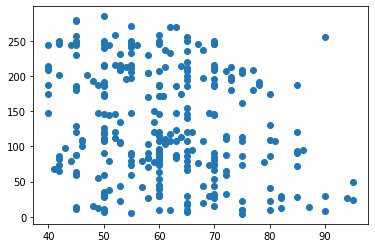

In [51]:
plt.scatter(data.age,data.Care_Time_Days)
plt.show()

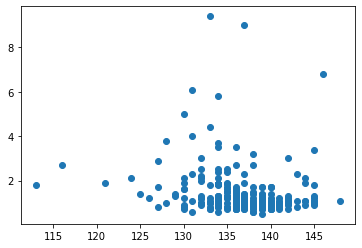

In [52]:
# better
plt.scatter(data.serum_sodium_mEq_per_L,data.serum_creatinine_mg_per_dL)
plt.show()

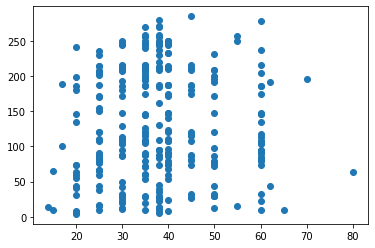

In [53]:
plt.scatter(data.ejection_fraction_percentage,data.Care_Time_Days)
plt.show()

In [54]:
x2_training = data[["serum_sodium_mEq_per_L"]].iloc[:240,]
y2_training = data[["serum_creatinine_mg_per_dL"]].iloc[:240,]
x2_testing = data[["serum_sodium_mEq_per_L"]].iloc[240:,]
y2_data = data[["serum_creatinine_mg_per_dL"]].iloc[240:,]

In [55]:
model2 = lr()
model2.fit(x2_training,y2_training)

LinearRegression()

In [56]:
y_model2 = model2.predict(x2_testing)
y_model2


array([[1.3368723 ],
       [1.46076073],
       [1.46076073],
       [1.25428001],
       [1.54335302],
       [1.41946459],
       [1.37816844],
       [1.50205688],
       [1.21298387],
       [1.7085376 ],
       [1.3368723 ],
       [1.17168773],
       [1.58464916],
       [1.62594531],
       [1.3368723 ],
       [1.21298387],
       [1.3368723 ],
       [1.3368723 ],
       [1.50205688],
       [1.50205688],
       [1.37816844],
       [1.58464916],
       [1.74983374],
       [1.29557616],
       [1.25428001],
       [1.29557616],
       [1.54335302],
       [1.29557616],
       [1.29557616],
       [1.62594531],
       [1.7085376 ],
       [1.54335302],
       [1.58464916],
       [1.29557616],
       [1.41946459],
       [1.41946459],
       [1.21298387],
       [1.29557616],
       [1.46076073],
       [1.46076073],
       [1.41946459],
       [1.46076073],
       [1.79112988],
       [1.37816844],
       [1.25428001],
       [1.50205688],
       [1.29557616],
       [1.625

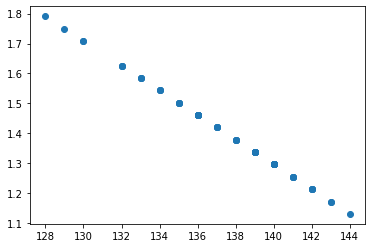

In [57]:
# scatter 
plt.scatter(x2_testing,y_model2)
plt.show()

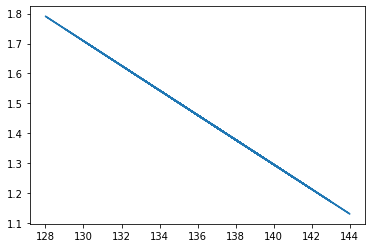

In [58]:
# plot
plt.plot(x2_testing,y_model2)
plt.show()

In [59]:
mc.mean_squared_error(y2_data,y_model2)

0.27822679377561477

In [60]:
mc.mean_absolute_error(y2_data,y_model2)

0.41714077066456684

In [61]:
y2_data

,serum_creatinine_mg_per_dL
240,1.30
241,1.30
242,1.10
243,0.90
244,1.80
245,1.40
246,1.10
247,2.40
248,1.00
249,1.20


In [62]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# - Do model_3 in linear regression using train_test_split method : 

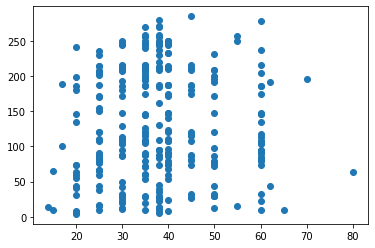

In [63]:
# using train_test_split()
# linear regression : x--> ejection_fraction_percentage, y--> Care_Time_Days
plt.scatter(data.ejection_fraction_percentage,data.Care_Time_Days)
plt.show()

# Task_6 : Split dataset (train_test_split method) 

In [64]:
x3 = data[["ejection_fraction_percentage"]]
y3 = data[["Care_Time_Days"]]
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,train_size=0.8)

In [65]:
model3 = lr()

In [66]:
model3.fit(x_train3,y_train3)

LinearRegression()

In [67]:
y_model3 = model3.predict(x_test3)
y_model3

array([[130.89530957],
       [133.53347668],
       [130.89530957],
       [132.21439313],
       [132.65408764],
       [131.33500409],
       [131.5988208 ],
       [130.89530957],
       [132.65408764],
       [130.45561505],
       [130.45561505],
       [131.33500409],
       [132.65408764],
       [131.33500409],
       [133.53347668],
       [132.65408764],
       [130.01592053],
       [131.77469861],
       [130.45561505],
       [133.09378216],
       [131.33500409],
       [131.77469861],
       [130.01592053],
       [130.45561505],
       [130.01592053],
       [131.33500409],
       [130.89530957],
       [131.77469861],
       [130.89530957],
       [130.45561505],
       [132.65408764],
       [130.89530957],
       [131.33500409],
       [129.4882871 ],
       [130.45561505],
       [131.5988208 ],
       [131.33500409],
       [130.89530957],
       [129.75210382],
       [131.5988208 ],
       [130.45561505],
       [131.5988208 ],
       [131.5988208 ],
       [131

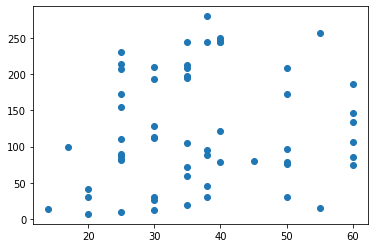

In [68]:
plt.scatter(x_test3,y_test3)
plt.show()

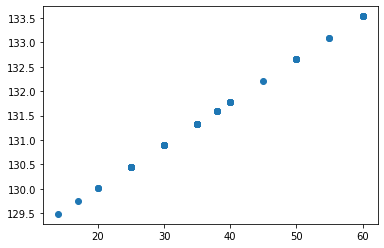

In [69]:
plt.scatter(x_test3,y_model3)
plt.show()

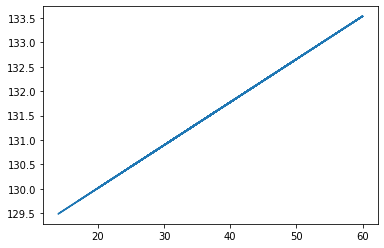

In [70]:
plt.plot(x_test3,y_model3)
plt.show()

In [71]:
error3 = mc.mean_squared_error(y_test3,y_model3) 
error3  

6245.2538100126985

In [72]:
model3.fit(x3,y3)
y_all_model3 = model3.predict(x3)

In [73]:
error3_all = mc.mean_squared_error(y3,y_all_model3)
error3_all
# this what will work with :)

5993.363611327959

# - Do model_4 in linear regression using (statsmodels.formula.api (sfa) ) :

In [74]:
# linear regression x---> smoking , y --> high_blood_pressure
# using statsmodels
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


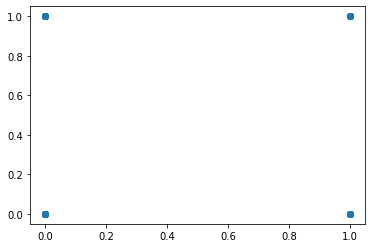

In [75]:
x4 = data[["smoking"]]
y4 = data[["high_blood_pressure"]]
plt.scatter(x4,y4)
plt.show()

In [76]:
x_test4 = data[["smoking"]].iloc[240:]
y_test4 = data[["high_blood_pressure"]].iloc[240:]
model4 = sfa.ols(formula="high_blood_pressure ~ smoking",data=data[:240]).fit()

In [77]:
y_model4 = model4.predict(x_test4)
res = model4.predict({"smoking":1})
res

0    0.341772
dtype: float64

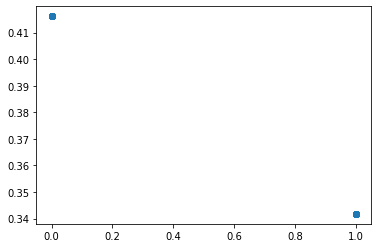

In [78]:
plt.scatter(x_test4,y_model4)
plt.show()

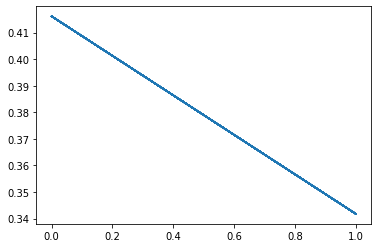

In [79]:
plt.plot(x_test4,y_model4)
plt.show()

In [80]:
error4 = mc.mean_squared_error(y_test4,y_model4)
error4

0.19576751588211577

# Second : Multilinear regression 

In [81]:
# multilinear regression ---> ( x ---> age, platelets_kiloplatelets_per_mL ) , ( y ---> DEATH_EVENT )
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Fifth : pairplot data_visualization 

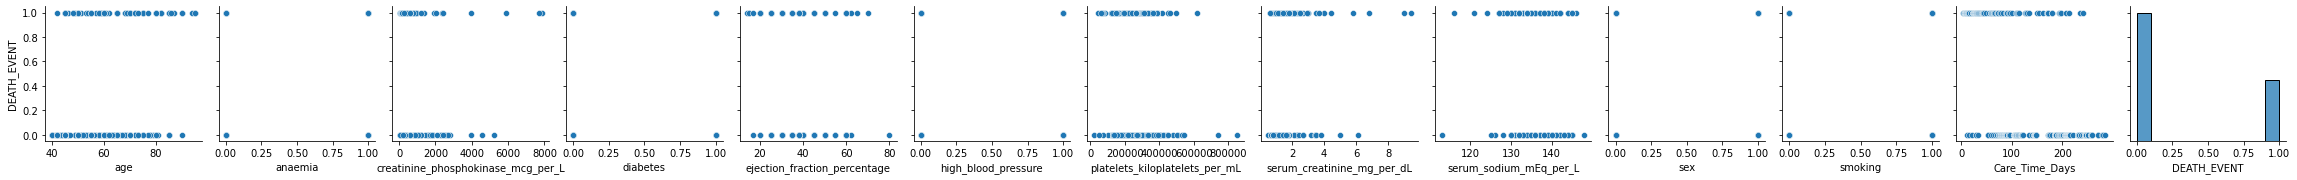

In [82]:
sb.pairplot(data,x_vars=data,y_vars="DEATH_EVENT")
plt.show()

#  - Do model_5 in multilinear regression :

In [83]:
# data preparation :
x5 = data[["age","platelets_kiloplatelets_per_mL"]]
y5 = data[["DEATH_EVENT"]]
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5,train_size=0.8)

In [84]:
# model preparation:
model5 = lr()

In [85]:
# model training:
model5.fit(x_train5,y_train5)

LinearRegression()

In [86]:
# model testing :
y_model5 = model5.predict(x_test5)
y_model5

array([[0.16284848],
       [0.49945932],
       [0.22129709],
       [0.21292257],
       [0.154352  ],
       [0.17144713],
       [0.32117995],
       [0.36610886],
       [0.31081871],
       [0.15989462],
       [0.32995165],
       [0.31213303],
       [0.32065011],
       [0.22132758],
       [0.21783291],
       [0.24202946],
       [0.3017413 ],
       [0.57928222],
       [0.3690226 ],
       [0.39352486],
       [0.23399114],
       [0.23466354],
       [0.53830613],
       [0.30860787],
       [0.16408121],
       [0.40980504],
       [0.22995673],
       [0.2648812 ],
       [0.39602082],
       [0.20174638],
       [0.16791208],
       [0.32927925],
       [0.37047947],
       [0.23258536],
       [0.43321711],
       [0.20108387],
       [0.18909271],
       [0.40372294],
       [0.34151514],
       [0.52808745],
       [0.39176228],
       [0.42103232],
       [0.2933058 ],
       [0.3186329 ],
       [0.46537041],
       [0.13889666],
       [0.30244419],
       [0.402

In [87]:
# calculate error ratio :
error5 = mc.mean_squared_error(y_test5,y_model5)
error5

0.18084676908521743

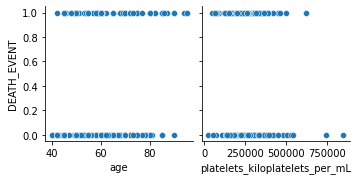

In [88]:
sb.pairplot(data,x_vars=x_test5,y_vars=y_test5)
plt.show()

In [89]:
# 2 ways to do visualization of multilinear regression after model:
 # - fist --> separate values with scatter 
 # - second --> make a new data_set

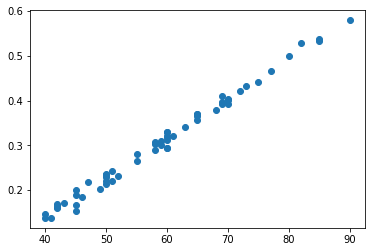

In [90]:
plt.scatter(x_test5[["age"]],y_model5)
plt.show()

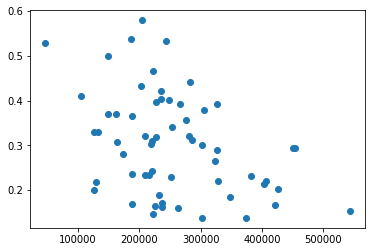

In [91]:
plt.scatter(x_test5[["platelets_kiloplatelets_per_mL"]],y_model5)
plt.show()

In [92]:
model5.coef_

array([[ 8.59865698e-03, -1.12066832e-07]])

In [93]:
model5.intercept_

array([-0.17173528])

In [94]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Sixth : relplot data_visualization

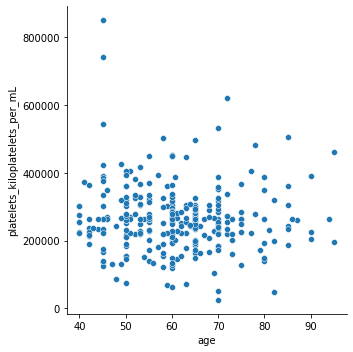

In [95]:
sb.relplot(data=data,x="age",y="platelets_kiloplatelets_per_mL")
plt.show()

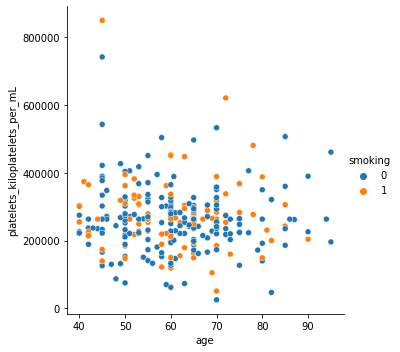

In [96]:
sb.relplot(data=data,x="age",y="platelets_kiloplatelets_per_mL",hue="smoking")
plt.show()

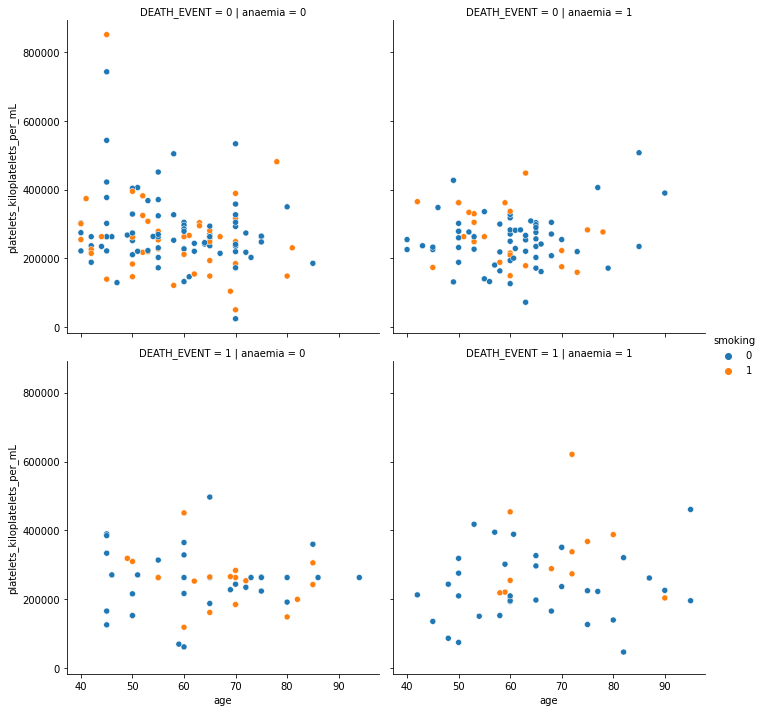

In [97]:
sb.relplot(data=data,x="age",y="platelets_kiloplatelets_per_mL",hue="smoking",col="anaemia",row="DEATH_EVENT")
plt.show()

# Third : Polynomail regression (Normal_way)

# - Doing model_6 in Polynomial regression :  

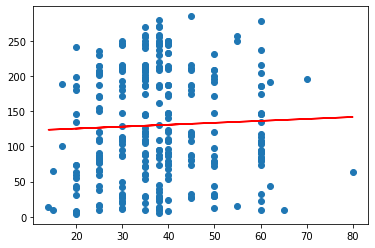

5993.363611327959

In [98]:
# linear regression : x--> ejection_fraction_percentage, y--> Care_Time_Days
# error3 ---> 5993.363611327959
x6 = data[["ejection_fraction_percentage"]]
y6 = data[["Care_Time_Days"]]
plt.scatter(x6,y6)
plt.plot(x3,y_all_model3,color="red")
plt.show()
old_error = mc.mean_squared_error(y3,y_all_model3)
old_error

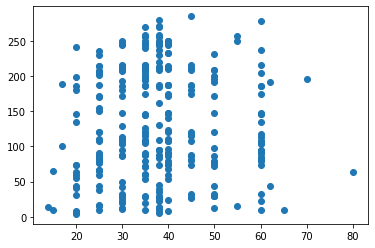

In [99]:
# polynomial regression : x--> ejection_fraction_percentage, y--> Care_Time_Days
# data(x) + polynimial features(degree) + linear regression  
x6 = data[["ejection_fraction_percentage"]]
y6 = data[["Care_Time_Days"]]
plt.scatter(x6,y6)
plt.show()

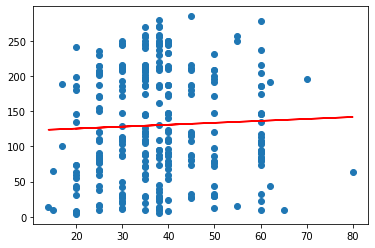

5993.363611327959


In [100]:
# X preparation by adding degree
pf6 = PolynomialFeatures(degree=1)
x_poly6 = pf6.fit_transform(x6) # degree is added 
# model_preparation 
model6 = lr()
# model_training with the new value of X 
model6.fit(x_poly6,y6)
# model_testing with the new value of X 
y_model6 = model6.predict(x_poly6)
plt.scatter(x6,y6)
plt.plot(x6,y_model6,color="red")
plt.show()
error6 = mc.mean_squared_error(y6,y_model6)
print(error6)

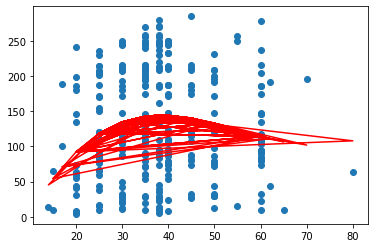

5694.74715694666


In [101]:
pf6 = PolynomialFeatures(degree=3)
x_poly6 = pf6.fit_transform(x6)
model6 = lr()
model6.fit(x_poly6,y6)
y_model6 = model6.predict(x_poly6)
plt.scatter(x6,y6)
plt.plot(x6,y_model6,color="red")
plt.show()
error6 = mc.mean_squared_error(y6,y_model6)
print(error6)

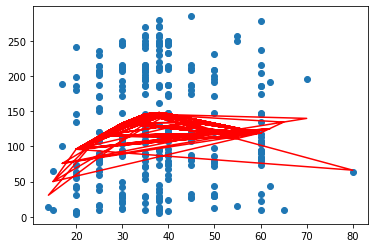

5652.365447212559


In [102]:
pf6 = PolynomialFeatures(degree=7)
x_poly6 = pf6.fit_transform(x6)
model6 = lr()
model6.fit(x_poly6,y6)
y_model6 = model6.predict(x_poly6)
plt.scatter(x6,y6)
plt.plot(x6,y_model6,color="red")
plt.show()
error6 = mc.mean_squared_error(y6,y_model6)
print(error6)

In [103]:
# degree 7 is more accurate
# NOTE : As we increase the degree the model take more points accordingly the accuracy increase 

In [104]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Third : Polynomail regression (Pipeline_way)

# - Doing model_7 in Polynomial regression using Pipeline_way

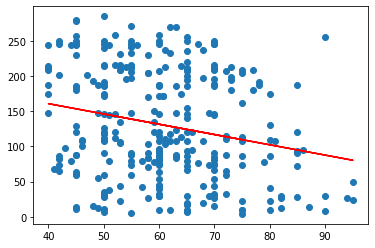

5702.386592923733


In [105]:
# linear/polynomial regression between x-->age and y-->Care_Time_Days
x7 = data[["age"]]
y7 = data[["Care_Time_Days"]]
inpt = [("polynomial",PolynomialFeatures(degree=1)),("model",lr())]
model7 = Pipeline(inpt)
model7.fit(x7,y7)
y_model7 = model7.predict(x7)
plt.scatter(x7,y7)
plt.plot(x7,y_model7,color="red")
plt.show()
error7 = mc.mean_squared_error(y7,y_model7)
print(error7)

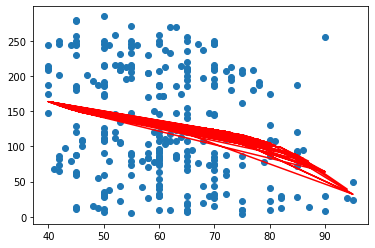

5657.714578118797


In [106]:
inpt = [("polynomial",PolynomialFeatures(degree=3)),("model",lr())]
model7 = Pipeline(inpt)
model7.fit(x7,y7)
y_model7 = model7.predict(x7)
plt.scatter(x7,y7)
plt.plot(x7,y_model7,color="red")
plt.show()
error7 = mc.mean_squared_error(y7,y_model7)
print(error7)

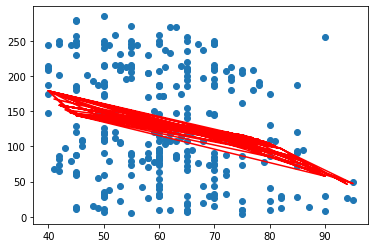

5643.750595744587


In [107]:
inpt = [("polynomial",PolynomialFeatures(degree=6)),("model",lr())]
model7 = Pipeline(inpt)
model7.fit(x7,y7)
y_model7 = model7.predict(x7)
plt.scatter(x7,y7)
plt.plot(x7,y_model7,color="red")
plt.show()
error7 = mc.mean_squared_error(y7,y_model7)
print(error7)

In [108]:
# degree 6 is more accurate 
# NOTE : As we increase the degree the model take more points accordingly the accuracy increase 

# Task_7 : Scaling( Standardization, Normalization, IQR )

In [109]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [110]:
# data
# x --> all columns except ( DEATH_EVENT )
# y --> DEATH_EVENT
x8 = data.iloc[:,:-1]
y8 = data[["DEATH_EVENT"]]
x_train8,x_test8,y_train8,y_test8 = train_test_split(x8,y8,train_size=0.8)

# First : Standardization Scaling ( StandardScaler )

In [111]:
std8 = StandardScaler()
x_train8_std = std8.fit_transform(x_train8)
x_test8_std = std8.fit_transform(x_test8)

# Task_5 : Learning Algorithms (Classification)

# First : KNeighborsClassifier algorithm

In [112]:
model8 = KNeighborsClassifier(n_neighbors=5)  # by default ---> 5
model8.fit(x_train8_std,y_train8)
y_model8_std = model8.predict(x_test8_std)
error8_accuracy = mc.accuracy_score(y_test8,y_model8_std)
print("accuracy : ",error8_accuracy)
error8_mean_squared = mc.mean_squared_error(y_test8,y_model8_std)
print("mean_squared_error: ",error8_mean_squared)

accuracy :  0.85
mean_squared_error:  0.15


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Second : Normalization Scaling ( MinMaxScaler )

In [113]:
# data scaling --> Normalization ( MinMaxScaler )
norm8 = MinMaxScaler()
x_train8_norm = norm8.fit_transform(x_train8)
x_test8_norm = norm8.fit_transform(x_test8)

In [114]:
model8 = KNeighborsClassifier(n_neighbors=5)  # by default ---> 5
model8.fit(x_train8_norm,y_train8)
y_model8_norm = model8.predict(x_test8_norm)
error8_accuracy = mc.accuracy_score(y_test8,y_model8_norm)
print("accuracy : ",error8_accuracy)
error8_mean_squared = mc.mean_squared_error(y_test8,y_model8_norm)
print("mean_squared_error: ",error8_mean_squared)

accuracy :  0.8166666666666667
mean_squared_error:  0.18333333333333332


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Third : IQR Scaling ( RobustScaler )

In [115]:
# data scaling --> IQR ( RobustScaler )
iqr8 = RobustScaler() 
x_train8_iqr = iqr8.fit_transform(x_train8)
x_test8_iqr = iqr8.fit_transform(x_test8)

In [116]:
model8 = KNeighborsClassifier(n_neighbors=5)  # by default ---> 5
model8.fit(x_train8_iqr,y_train8)
y_model8_iqr = model8.predict(x_test8_iqr)
error8_accuracy = mc.accuracy_score(y_test8,y_model8_iqr)
print("accuracy : ",error8_accuracy)
error8_mean_squared = mc.mean_squared_error(y_test8,y_model8_iqr)
print("mean_squared_error: ",error8_mean_squared)

accuracy :  0.7833333333333333
mean_squared_error:  0.21666666666666667


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# - With no Scaling : 

In [117]:
model8.fit(x_train8,y_train8)
y_model8 = model8.predict(x_test8)
error8_accuracy = mc.accuracy_score(y_test8,y_model8)
print("accuracy : ",error8_accuracy)
error8_mean_squared = mc.mean_squared_error(y_test8,y_model8)
print("mean_squared_error: ",error8_mean_squared)

c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy :  0.75
mean_squared_error:  0.25


In [118]:
# We can observe that the most accurate classification model with normalization scaling 

# Seventh : Pie data_visualization

In [119]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [120]:
# pie take the number of the unique values 
data.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [121]:
values_list1 = data.anaemia.value_counts().tolist()

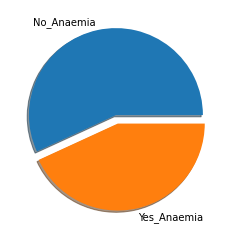

In [122]:
plt.pie(values_list1,labels=["No_Anaemia","Yes_Anaemia"],explode=[0,0.1],shadow=True)
plt.show()

In [123]:
data.ejection_fraction_percentage.value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction_percentage, dtype: int64

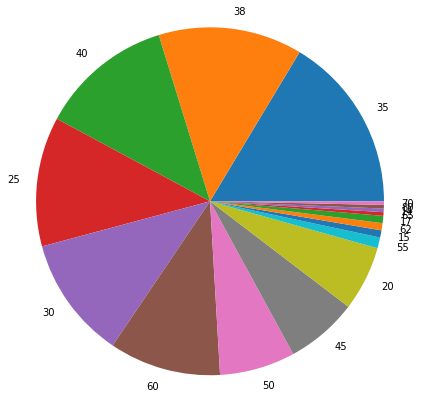

In [124]:
values_list2 = data.ejection_fraction_percentage.value_counts().tolist()
labels2 = data.ejection_fraction_percentage.value_counts().index
plt.pie(values_list2,labels=labels2,radius=2)
plt.show()

# Second : Naive Bayes classifier algorithm 

In [125]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [126]:
# data x --> all except "DEATH_EVENT" , y --> "DEATH_EVENT"
x9 = data.iloc[:,:-1]
y9 = data[["DEATH_EVENT"]]
x_train9,x_test9,y_train9,y_test9 = train_test_split(x9,y9,train_size=0.8)

In [127]:
gnb = GaussianNB()
model9 = gnb.fit(x_train9,y_train9)
y_model9 = gnb.predict(x_test9)
error9_accuracy = mc.accuracy_score(y_test9,y_model9)
print("accuracy : ",error9_accuracy)
error9_mean_squared = mc.mean_squared_error(y_test9,y_model9)
print("mean_squared_error: ",error9_mean_squared)

accuracy :  0.8166666666666667
mean_squared_error:  0.18333333333333332


c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Third : Support Vector Machine (SVM) algorithm 

In [128]:
# data 
x10 = data.iloc[:,:-1]
y10 = data[["DEATH_EVENT"]]
x_train10,x_test10,y_train10,y_test10 = train_test_split(x10,y10,train_size=0.8)

In [129]:
model10 = svm.SVC(kernel="linear")  

In [130]:
# model10.fit(x_train10,y_train10)   # take alot of time 

In [131]:
# model10.fit(x_train10.iloc[:,:6],y_train10)   # take alot of time 

In [132]:
# model10.fit(x_train10.iloc[:,:3],y_train10)   # take alot of time 

In [133]:
# do the algorithm with only one column as X 
model10.fit(x_train10[["age"]],y_train10)

c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [134]:
y_model10 = model10.predict(x_test10[["age"]])

In [135]:
error10_accuracy = mc.accuracy_score(y_test10,y_model10)
print("accuracy : ",error10_accuracy)
error10_mean_squared = mc.mean_squared_error(y_test10,y_model10)
print("mean_squared_error : ",error10_mean_squared)
error10_confusion = mc.confusion_matrix(y_test10,y_model10)
print("confusion_matrix : ",error10_confusion)   # ---> ??!

accuracy :  0.6833333333333333
mean_squared_error :  0.31666666666666665
confusion_matrix :  [[41  0]
 [19  0]]


In [136]:
std10 = StandardScaler()
x_train10_std = std10.fit_transform(x_train10)
x_test10_std = std10.fit_transform(x_test10)

In [137]:
model10.fit(x_train10_std,y_train10)

c:\users\h p\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [138]:
y_model10_std = model10.predict(x_test10_std)
error10_accuracy_std = mc.accuracy_score(y_test10,y_model10_std)
print("accuracy : ",error10_accuracy_std)
error10_mean_squared_std = mc.mean_squared_error(y_test10,y_model10_std)
print("mean_squared_error : ",error10_mean_squared_std)

accuracy :  0.8333333333333334
mean_squared_error :  0.16666666666666666


In [139]:
# We observe that it take less time to train the model in SVM algorithm in case of Scaling 
# While without Scaling it takes alot of time  

#  Task_5 : Learning Algorithms (Clustering)

In [140]:
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


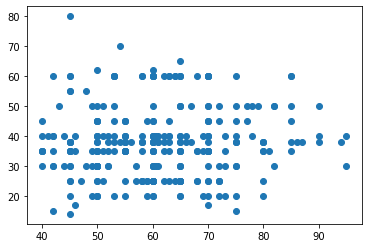

In [141]:
plt.scatter(data.age,data.ejection_fraction_percentage)
plt.show()

In [142]:
x11 = data[["age","ejection_fraction_percentage"]]
x11

,age,ejection_fraction_percentage
0,75.0,20
1,55.0,38
2,65.0,20
3,50.0,20
4,65.0,20
...,...,...
294,62.0,38
295,55.0,38
296,45.0,60
297,45.0,38


In [143]:
model11 = KMeans(n_clusters = 2)

In [144]:
x11_labels = model11.fit_predict(x11)

In [145]:
x11_labels

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [146]:
data["x11_labels"] = x11_labels
data

,age,anaemia,creatinine_phosphokinase_mcg_per_L,diabetes,ejection_fraction_percentage,high_blood_pressure,platelets_kiloplatelets_per_mL,serum_creatinine_mg_per_dL,serum_sodium_mEq_per_L,sex,smoking,Care_Time_Days,DEATH_EVENT,x11_labels
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,1
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0


In [147]:
# location of centroides 
model11.cluster_centers_

array([[56.82077387, 32.1959799 ],
       [68.82      , 49.8       ]])

In [148]:
# number of collections 
model11.n_clusters

2

In [149]:
# number of moves take by the centroides to be in the best loaction in the datasets in each group 
model11.n_iter_

12

In [150]:
x11_labels = pd.DataFrame(x11_labels)
x11_labels.columns = ["x11_labels"]
df11 = pd.concat([x11,x11_labels],axis=1)

In [151]:
group0 = df11[df11.x11_labels == 0]
group1 = df11[df11.x11_labels == 1]

# - After clustering : 

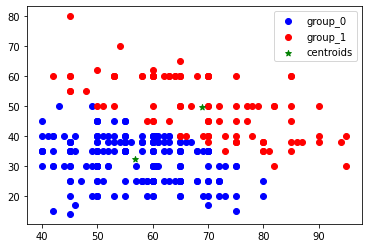

In [152]:
plt.scatter(group0.age,group0.ejection_fraction_percentage,color="blue")
plt.scatter(group1.age,group1.ejection_fraction_percentage,color = "red")
plt.scatter(model11.cluster_centers_[:,0],model11.cluster_centers_[:,1],color="green",marker="*")
plt.legend(["group_0","group_1","centroids"])
plt.show()

# - Before Clustering : 

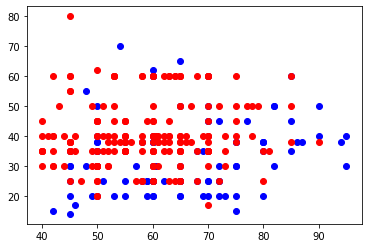

In [153]:
plt.scatter(data.age[data.DEATH_EVENT == 1],data.ejection_fraction_percentage[data.DEATH_EVENT == 1],color="blue")
plt.scatter(data.age[data.DEATH_EVENT == 0],data.ejection_fraction_percentage[data.DEATH_EVENT == 0],color="red")
plt.show()